# EDA - Exploratory data analysis

## Preprocessing data

### Dealing with categorical features in Python

1. Scikitlean **OneHotEncoder()**
2. Pandas **get_dummies()**

In [337]:
import pandas as pd
from sklearn import datasets

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv')
df['origin'] = df['origin'].replace(1, 'US').replace(2, 'ASIA').replace(3, 'Europe')

df_origin = pd.get_dummies(df, columns=['origin'])

df_origin[['origin_Europe', 'origin_US']] = df_origin[['origin_Europe', 'origin_US']].astype(int)

df_origin = df_origin.drop('origin_ASIA', axis=1)

df_origin.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,origin_Europe,origin_US
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,0,1
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,0,1
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,0,1
4,17.0,8,302.0,140,3449,10.5,70,ford torino,0,1


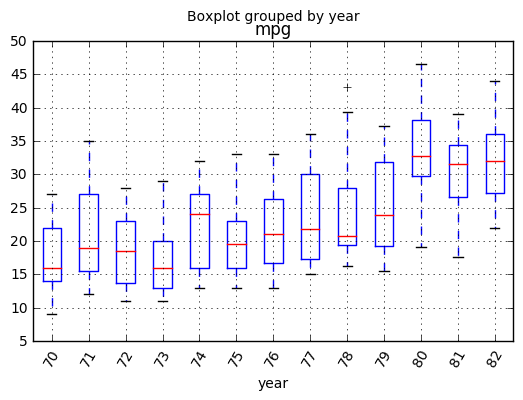

In [345]:
df_origin.boxplot('mpg', 'year', rot=60)

### Handling missing data

In [407]:
def setDiabetesData():
    df = pd.read_csv('https://raw.githubusercontent.com/hzitoun/applying-machine-learning/master/data/1_diabetes.csv')
    df.Insulin.replace(0, np.nan, inplace=True)
    df.BMI.replace(0, np.nan, inplace=True)
    df.SkinThickness.replace(0, np.nan, inplace=True)

    X = df.drop(['Outcome'], axis=1)

    y = df['Outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


In [408]:
setDiabetesData()

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35.0,NaN,33.6,0.127,47,1
1,0,84,82,31.0,125.0,38.2,0.233,23,0
2,0,145,0,NaN,NaN,44.2,0.630,31,1
3,0,135,68,42.0,250.0,42.3,0.365,24,1
4,1,139,62,41.0,480.0,40.7,0.536,21,0


##### Imputing missing data

In [376]:
#imputing missing data

from sklearn.preprocessing import Imputer

# axis = 0 ==> imput along columns! (1 is rows)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

X = df.Insulin.values.reshape(-1, 1)

imp.fit(X)

df.Insulin = imp.transform(X)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35.0,153.743295,33.6,0.127,47,1
1,0,84,82,31.0,125.000000,38.2,0.233,23,0
2,0,145,0,NaN,153.743295,44.2,0.630,31,1
3,0,135,68,42.0,250.000000,42.3,0.365,24,1
4,1,139,62,41.0,480.000000,40.7,0.536,21,0


##### Imputing using pipeline

In [409]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#strategies
    #If “mean”, then replace missing values using the mean along the axis.
    #If “median”, then replace missing values using the median along the axis.
    #If “most_frequent”, then replace missing using the most frequent value along the axis.
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

logreg = LogisticRegression()

# tuple name for the step, estimator
steps = [('imputation', imp), ('logistic_regression', logreg)]

pipeline = Pipeline(steps)

setDiabetesData()

pipeline.fit(X_train, y_train)

pipeline.predict(X_test)

pipeline.score(X_test, y_test)

0.77000000000000002

### Normalzing a.k.a Centering and scaling


In [410]:
# Scaling in features

from sklearn.preprocessing import scale

imp.fit(X)

X_tranformed = imp.transform(X)

print(np.mean(X_tranformed), np.std(X_tranformed))

X_scaled = scale(X_tranformed)

print(np.mean(X_scaled), np.std(X_scaled))

55.4159502302 60.940031613
3.77475828373e-18 1.0


In [421]:
# let us add the scaler to our pipeline!

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

steps = [('imputation', imp), ('scaler', StandardScaler()), 
         ('logistic_regression', logreg)]

pipeline = Pipeline(steps)

setDiabetesData()

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.score(X_test, y_test))

print(accuracy_score(y_test, y_pred))

0.77
0.77


CV and scaling in a pipeline

In [430]:
# convention !! estimator_name__parameter
parameters = {'logistic_regression__penalty' : ['l1', 'l2']}
from sklearn.model_selection import GridSearchCV 

cv = GridSearchCV(pipeline, param_grid=parameters)


cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_params_)

print(classification_report(y_test, y_pred))

{'logistic_regression__penalty': 'l2'}
             precision    recall  f1-score   support

          0       0.80      0.87      0.83       397
          1       0.69      0.58      0.63       203

avg / total       0.76      0.77      0.76       600



## Supervised classification problem

In [255]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [256]:
iris = datasets.load_iris()

In [257]:
type(iris)

sklearn.utils.Bunch

In [258]:
print(iris.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'target_names'])


In [259]:
X = iris.data
Y = iris.target

type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [260]:
X.shape, Y.shape

((150, 4), (150,))

In [261]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [262]:
df = pd.DataFrame(X, columns=iris.feature_names)

In [263]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visual EDA

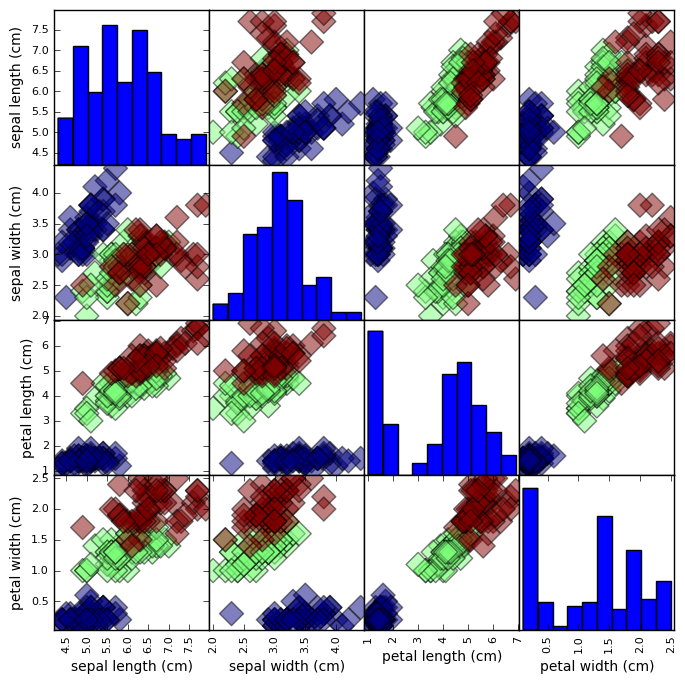

In [264]:
_ = pd.scatter_matrix(df, c =Y, figsize = [8, 8], s=150, marker='D')

## Building classifier

In [265]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [266]:
#predict
X_new = np.array([[1, 2, 3, 5]])
prediction = knn.predict(X_new)

print('Prediction {}'.format(iris.target_names[prediction]))

Prediction ['versicolor']


## Measuring performance

In [267]:
from sklearn.model_selection import train_test_split

# random_state = number random generator, seed
# stratify distrubtes lables into train and test as it was on the orignal test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=21, stratify=Y)

In [269]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [270]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1])

In [271]:
knn.score(X_test, y_test)

0.9555555555555556

### Evaluating classification model

In [272]:
from sklearn.metrics import classification_report, confusion_matrix 
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      0.93      0.93        15
          2       0.93      0.93      0.93        15

avg / total       0.96      0.96      0.96        45



#### Hyperparameters tunning with grid search CV

In [300]:
from sklearn.model_selection import GridSearchCV 
# (param, possible values)
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1, 50)} #in KNN or alpha in Rigde or Lasso Regressoin!!!
knn_cv = GridSearchCV(knn, param_grid, cv=5)
%timeit knn_cv.fit(X_train, y_train)

#see the best param
print(knn_cv.best_params_)

#sse the best score
print(knn_cv.best_score_)

1 loop, best of 3: 506 ms per loop
{'n_neighbors': 3}
0.971428571429


In [303]:
# Predict on the test set and compute metrics
from sklearn.metrics import mean_squared_error

r2 = knn_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)


print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet R squared: 0.9777777777777777
Tuned ElasticNet MSE: 0.044444444444444446


#### Hyperparameters tunning with Randomized grid search CV

In [299]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# (param, possible values)
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : randint(1, 50)}
knn_cv = RandomizedSearchCV(knn, param_grid, cv=5)
%timeit knn_cv.fit(X_train, y_train)

#see the best param
print(knn_cv.best_params_)

#sse the best score
print(knn_cv.best_score_)

10 loops, best of 3: 106 ms per loop
{'n_neighbors': 10}
0.971428571429


### Logistic Regression 

In [228]:
from sklearn.linear_model import LogisticRegression  
logreg = LogisticRegression() 
logreg.fit(X_train, (y_train == 1).astype(int))  
y_pred = logreg.predict(X_test)

#### Plotting the ROC curve to choose the right threshold 

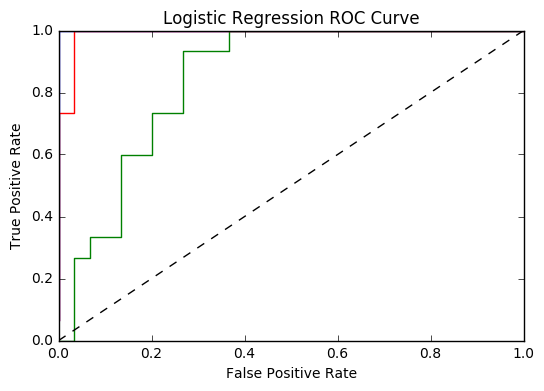

In [235]:
from sklearn.metrics import roc_curve 

# since we have 3 classes 
for i in range(3):
    logreg.fit(X_train, (y_train == i).astype(int))  
    y_pred_prob = logreg.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve((y_test == i).astype(int), y_pred_prob) 
    plt.plot(fpr, tpr, label='Logistic Regression') 

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Logistic Regression ROC Curve') 
plt.show()

#### Evaluate model's performance

In [245]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# since we have 3 classes 
for i in range(3):
    logreg.fit(X_train, (y_train == i).astype(int)) 
    y_pred_prob = logreg.predict_proba(X_test)[:,1]
    # Compute and print AUC score
    print("AUC: {}".format(roc_auc_score(y_test == i, y_pred_prob)))
    # Compute cross-validated AUC scores: cv_auc
    cv_auc = cross_val_score(logreg, X_train , (y_train == i).astype(int), cv=5, scoring="roc_auc")
    # Print list of AUC scores
    print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 1.0
AUC scores computed using 5-fold cross-validation: [ 1.  1.  1.  1.  1.]
AUC: 0.8466666666666667
AUC scores computed using 5-fold cross-validation: [ 0.75510204  0.66326531  0.81632653  0.81632653  0.79591837]
AUC: 0.9911111111111112
AUC scores computed using 5-fold cross-validation: [ 1.  1.  1.  1.  1.]


## Supervised regression problem

In [279]:
boston = datasets.load_boston()
df = pd.DataFrame(data = boston.data, columns=boston.feature_names)

In [71]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [280]:
X = df.values
y = boston.target

In [79]:
X_rooms = X[: , 5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [82]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

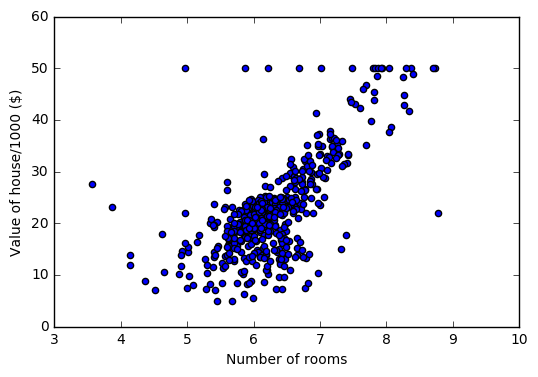

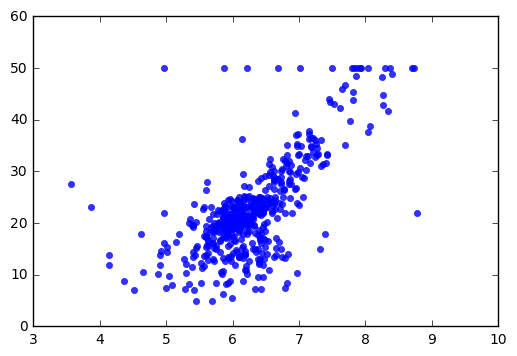

In [90]:
# plot house prices values as a function of number of rooms

plt.scatter(X_rooms, y)
plt.ylabel('Value of house/1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

#or with seaborn

sns.regplot(x=X_rooms, y=y, fit_reg=False)


### Using linear regression model

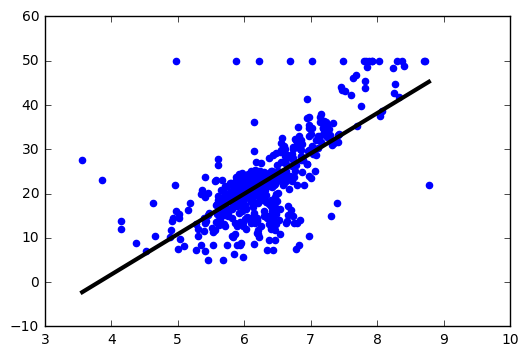

In [97]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

plt.scatter(X_rooms, y, color="blue")
plt.plot(prediction_space, reg.predict(prediction_space), color="black", linewidth=3)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [118]:
reg_all.score(X_test, y_test)

0.71092035863262315

## Cross-validation with k-folds


In [121]:
from sklearn.model_selection import cross_val_score 
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)
cv_results

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

In [123]:
np.mean(cv_results)

0.35074135093256043

### Regularized Regression

#### Ridge regression  alpha * Sum(ai²)

In [287]:
from sklearn.linear_model import Ridge

# alpha is the regularization term lambda
ridge = Ridge(alpha=1, normalize=True)

ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.83871867297396363

#### Hyperparameters tunning with grid search CV

In [288]:
# Setup the hyperparameter grid
alpha_space = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_space}
ridge = Ridge(normalize=True)
ridge_cv  = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X, y)
#see the best param
print(ridge_cv.best_params_)
#sse the best score
print(ridge_cv.best_score_)

{'alpha': 0.32374575428176433}
0.483268151204


#### Lasso regression alpha * Sum(|ai|)
We can use lasso to **select the most important features** of a dataset !!!! because it tends to shrink of coefficients of less important features to be exactly 0

In [138]:
from sklearn.linear_model import Lasso

# alpha is the regularization term lambda
lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)

lasso_pred = ridge.predict(X_test)

lasso.score(X_test, y_test)

0.59502292925878275

In [150]:
lasso_coef = lasso.fit(X, y).coef_
lasso_coef

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469429, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795828,  0.        , -0.42817442])

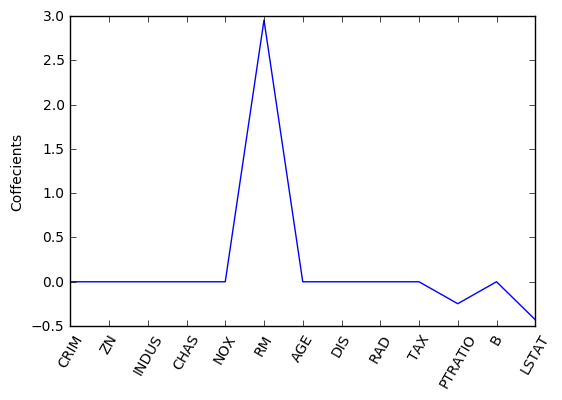

In [162]:
_ = plt.plot(range(len(df.columns)), lasso_coef)
_ = plt.xticks(range(len(df.columns)), df.columns, rotation=60)
plt.ylabel('Coffecients')

In [163]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

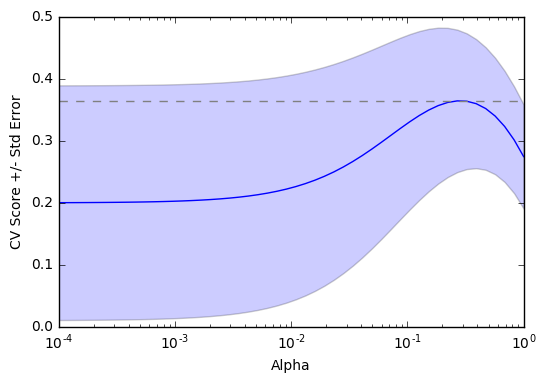

In [164]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
